# matplotlib

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
url = r'/Users/choejong-gyu/Documents/05.데이터분석/data1/시도별 전출입 인구수.xlsx'

df = pd.read_excel(url,engine='openpyxl',header=0)
df.head()


,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,전출지별,전입지별,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),...,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명)
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,...,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226
2,NaN,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,...,2025358,1873188,1733015,1721748,1555281,1520090,1573594,1589431,1515602,1472937
3,NaN,부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,...,514502,519310,519334,508043,461042,478451,485710,507031,459015,439073
4,NaN,대구광역시,-,-,-,-,-,-,-,-,...,409938,398626,370817,370563,348642,351873,350213,351424,328228,321182


In [7]:
# 누락값(NaN)을 앞 데이터로 채움

df = df.fillna(method='ffill')
df.head()

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,전출지별,전입지별,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),...,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명)
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,...,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226
2,전국,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,...,2025358,1873188,1733015,1721748,1555281,1520090,1573594,1589431,1515602,1472937
3,전국,부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,...,514502,519310,519334,508043,461042,478451,485710,507031,459015,439073
4,전국,대구광역시,-,-,-,-,-,-,-,-,...,409938,398626,370817,370563,348642,351873,350213,351424,328228,321182


In [8]:
# 전출지가 서울특별시인 데이터만 추출

mask = (df['전출지별'] == '서울특별시')
mask.head()

0    False
1    False
2    False
3    False
4    False
Name: 전출지별, dtype: bool

In [9]:
mask.tail()

320    False
321    False
322    False
323    False
324    False
Name: 전출지별, dtype: bool

In [10]:
df_seoul = df[mask]
df_seoul.head()

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
19,서울특별시,전국,1448985,1419016,1210559,1647268,1819660,2937093,2495620,2678007,...,2083352,1925452,1848038,1834806,1658928,1620640,1661425,1726687,1655859,1571423
20,서울특별시,서울특별시,1232619,1158556,985945,1345508,1511726,2401970,2041724,2212213,...,1426213,1286855,1199708,1215122,1069300,1053008,1098023,1129529,1061915,1018807
21,서울특별시,부산광역시,11568,11130,11768,16307,22220,27515,23732,27213,...,17353,17738,17418,18816,16135,16153,17320,17009,15062,14484
22,서울특별시,대구광역시,-,-,-,-,-,-,-,-,...,9720,10464,10277,10397,10135,10631,10062,10191,9623,8891
23,서울특별시,인천광역시,-,-,-,-,-,-,-,-,...,50493,45392,46082,51641,49640,47424,43212,44915,43745,40485


In [15]:
# 서울에서 다른 지역으로 이동한 데이터만 추출하여 정리

# and -> &

mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')

df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'],axis=1)
df_seoul.rename({'전입지별':'전입지'}, axis=1,inplace=True)
df_seoul.set_index('전입지',inplace=True)
df_seoul.head()

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
전입지,,,,,,,,,,,,,,,,,,,,,
전국,1448985,1419016,1210559,1647268,1819660,2937093,2495620,2678007,3028911,2441242,...,2083352,1925452,1848038,1834806,1658928,1620640,1661425,1726687,1655859,1571423
부산광역시,11568,11130,11768,16307,22220,27515,23732,27213,29856,28542,...,17353,17738,17418,18816,16135,16153,17320,17009,15062,14484
대구광역시,-,-,-,-,-,-,-,-,-,-,...,9720,10464,10277,10397,10135,10631,10062,10191,9623,8891
인천광역시,-,-,-,-,-,-,-,-,-,-,...,50493,45392,46082,51641,49640,47424,43212,44915,43745,40485
광주광역시,-,-,-,-,-,-,-,-,-,-,...,10846,11725,11095,10587,10154,9129,9759,9216,8354,7932


In [17]:
# 서울에서 경기도로 이동한 인구 데이터 값만 선택

sr_one = df_seoul.loc['경기도']
sr_one.head()
print(sr_one)

1970    130149
1971    150313
1972     93333
1973    143234
1974    149045
1975    253705
1976    202276
1977    207722
1978    237684
1979    278411
1980    297539
1981    252073
1982    320174
1983    400875
1984    352238
1985    390265
1986    412535
1987    405220
1988    415174
1989    412933
1990    473889
1991    384714
1992    428344
1993    502584
1994    542204
1995    599411
1996    520566
1997    495454
1998    407050
1999    471841
2000    435573
2001    499575
2002    516765
2003    457656
2004    400206
2005    414621
2006    449632
2007    431637
2008    412408
2009    398282
2010    410735
2011    373771
2012    354135
2013    340801
2014    332785
2015    359337
2016    370760
2017    342433
Name: 경기도, dtype: object


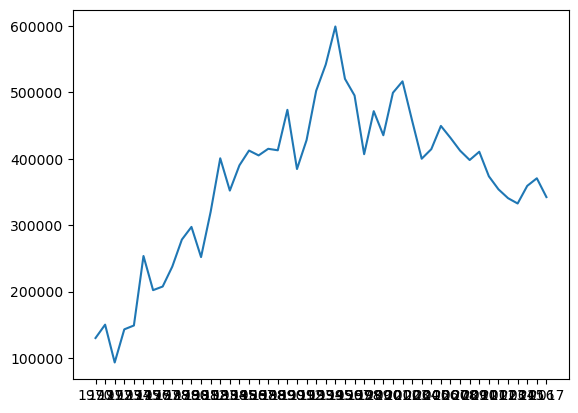

In [18]:
plt.plot(sr_one.index,sr_one.values)
plt.show()

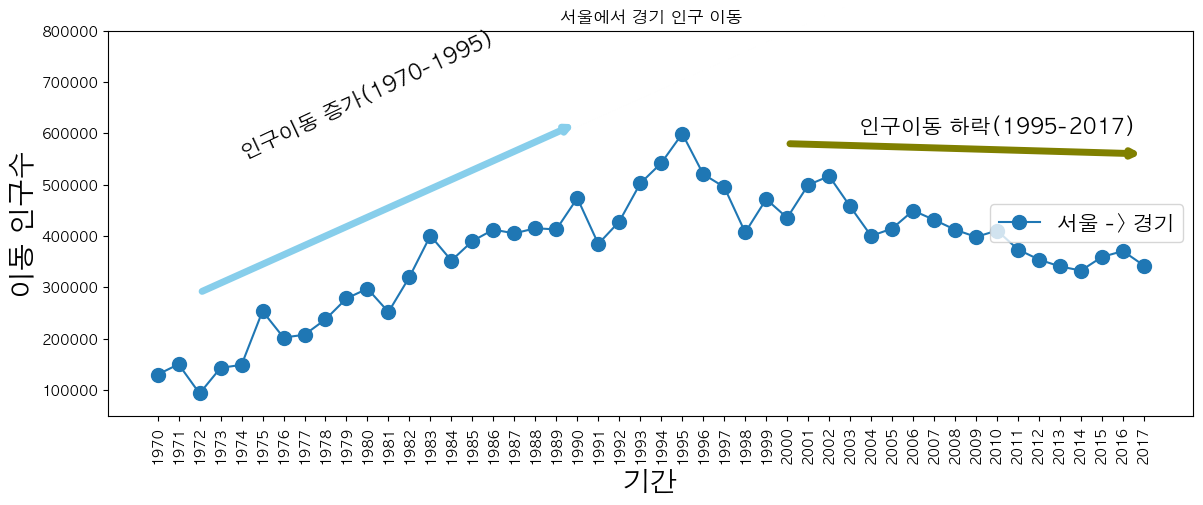

In [55]:
from matplotlib import font_manager, rc


font_path = '/System/Library/Fonts/Supplemental/AppleGothic.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font',family=font_name)

plt.figure(figsize=(14,5))


#x축 눈금 라벨 회전하기 
plt.xticks(size= 10,rotation = 'vertical')

plt.plot(sr_one,marker='o',markersize=10)
plt.title('서울에서 경기 인구 이동')

plt.xlabel('기간' ,size= 20)
plt.ylabel('이동 인구수', size=20)
plt.legend(labels=['서울 -> 경기'], loc= 7, fontsize=15) # 범례표시

# y축 범위 지정 (최소값,최대값)
plt.ylim(50000,800000)



# 주석 표시 - 화살표

plt.annotate('',
             xy=(20,620000), #화살표의 머리 부분 (끝점)
             xytext=(2,290000), #화살표의 꼬리 부분 (시작점)
             xycoords='data',
             arrowprops=dict(arrowstyle='->', color='skyblue', lw =5
            ),)

# 주석 표시 - 텍스트
plt.annotate('인구이동 증가(1970-1995)',
            xy = (10,550000),
            rotation = 25,
            va = 'baseline',
            ha = 'center',
            fontsize =15,
)



plt.annotate('',
             xy=(47,560000), #화살표의 머리 부분 (끝점)
             xytext=(30,580000), #화살표의 꼬리 부분 (시작점)
             xycoords='data',
             arrowprops=dict(arrowstyle='->', color='olive', lw =5
            ),)

# 주석 표시 - 텍스트
plt.annotate('인구이동 하락(1995-2017)',
            xy = (40,600000),
            rotation = 0,
            va = 'baseline',
            ha = 'center',
            fontsize =15,
)



plt.show()

In [38]:
# 스타일 리스트 출력

print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


# seaborn

In [1]:
import seaborn as sns
titanic = sns.load_dataset('titanic')

print(titanic.head())
print('\n')
print(titanic.info())


   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-

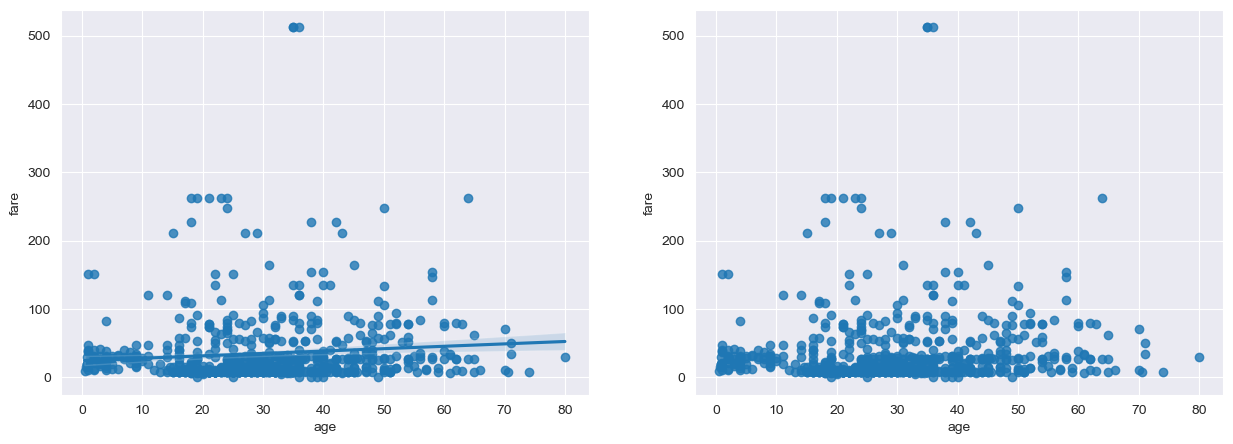

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 스타일 테마 설정(5가지: darkgird, whitegrid,dark,white,ticks)

sns.set_style('darkgrid')

fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
# 선형 회귀선 표시
sns.regplot(x='age',            # regplot = 회귀 플롯 생성
            y ='fare',
            data=titanic,
            ax=ax1)

sns.regplot(x='age',        #x축
            y='fare',       #y축
            data=titanic,
            ax=ax2,     # 두번째 그래프
            fit_reg=False) # 회귀선 미표시

plt.show()

/var/folders/yk/b_g90hzj7bv2tkjmnj046s6r0000gn/T/ipykernel_5057/105476614.py:19: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic['fare'], ax=ax1)


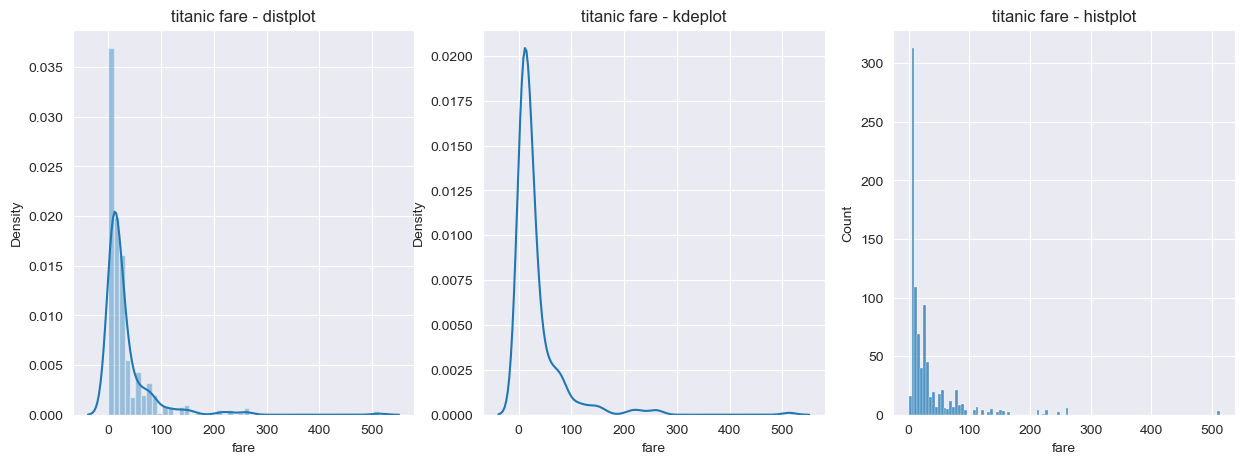

In [19]:
#  단변수


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

titanic = sns.load_dataset('titanic')

# 스타일테마 설정(5가지:darkgrid,whitegird,dark,white,ticks)
sns.set_style('darkgrid')

# 그래프 객체 생성 

fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

#distplot
sns.distplot(titanic['fare'], ax=ax1)
# kdeplot
sns.kdeplot(x='fare',data=titanic,ax=ax2)
# histplot
sns.histplot(x='fare',data=titanic, ax=ax3)


ax1.set_title('titanic fare - distplot')
ax2.set_title('titanic fare - kdeplot')
ax3.set_title('titanic fare - histplot')


plt.show()

class   First  Second  Third
sex                         
female     94      76    144
male      122     108    347


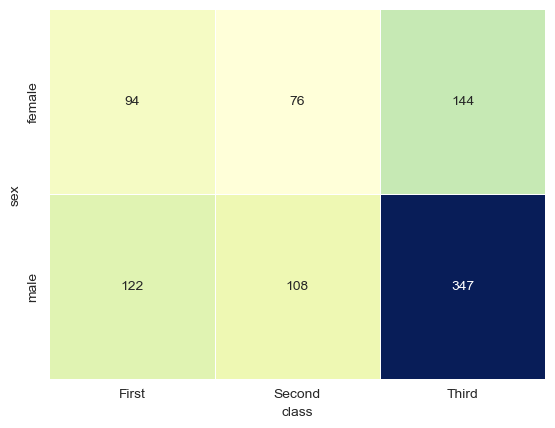

In [23]:
# 두개의 변수 확인

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

titanic = sns.load_dataset('titanic')

# 스타일테마 설정(5가지:darkgrid,whitegird,dark,white,ticks)
sns.set_style('darkgrid')

table = titanic.pivot_table(index=['sex'],columns=['class'],aggfunc='size')
# 히트맵 그리기
sns.heatmap(table,
            annot = True, fmt='d', # 데이터 값 표시여부, 정수형 포맷
            cmap = 'YlGnBu', # 컬러 맵
            linewidths=.5, # 구분 선
            cbar = False) # 컬러 바 표시 여부
print(table)
plt.show()

/Users/choejong-gyu/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 12.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


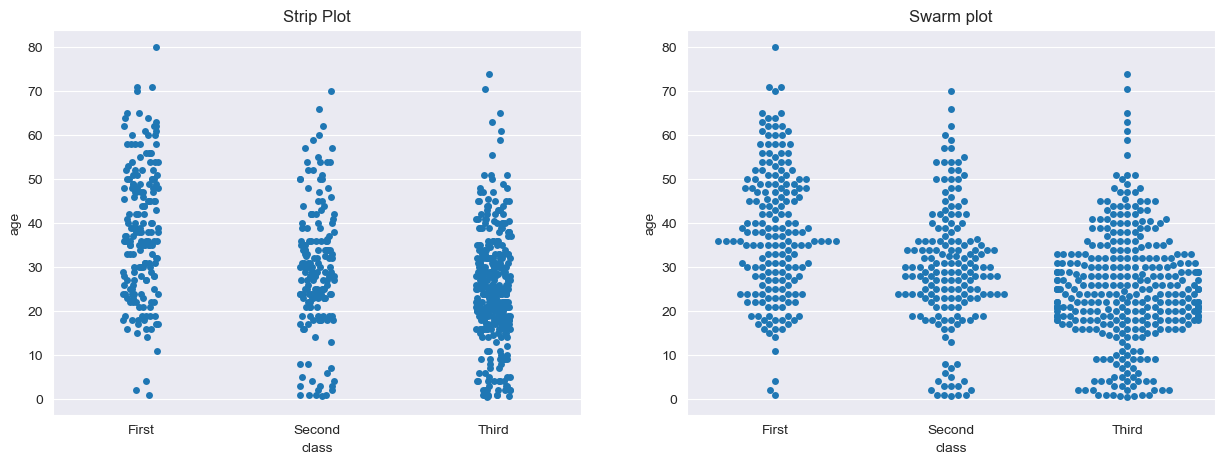

In [27]:
# 범주형 변수의 값 확인

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

titanic = sns.load_dataset('titanic')
# 스타일테마 설정(5가지:darkgrid,whitegird,dark,white,ticks)
sns.set_style('darkgrid')

fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

# 이산형 변수의 분포 - 데이터 분산 미고려
sns.stripplot(x='class',
              y='age',
              data=titanic,
              ax=ax1)

# 이산형 변수의 분포 - 데이터 분산 고려 (중복 x)

sns.swarmplot(x='class',
              y='age',
              data=titanic,
              ax=ax2)

ax1.set_title('Strip Plot')
ax2.set_title('Swarm plot')
plt.show()


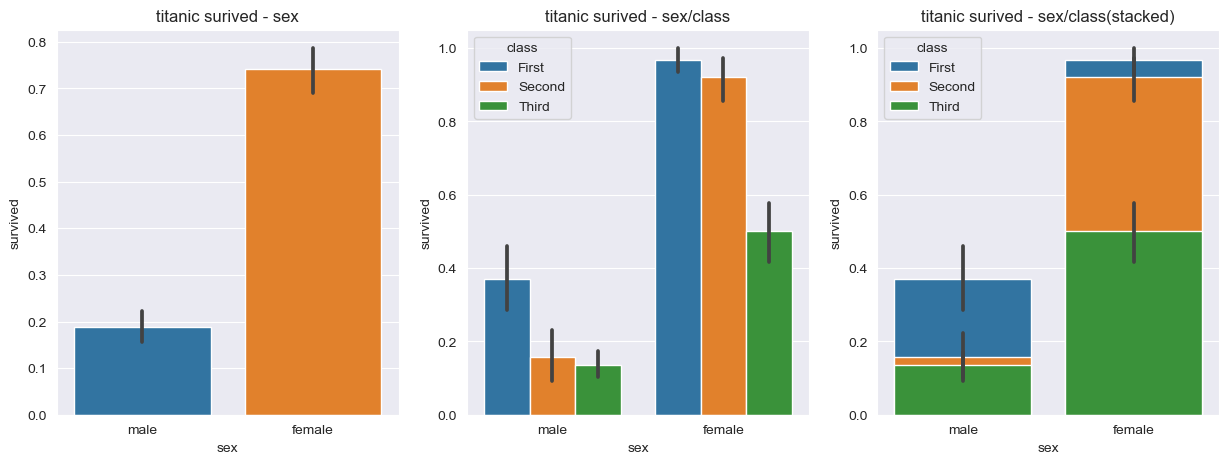

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

titanic = sns.load_dataset('titanic')
# 스타일테마 설정(5가지:darkgrid,whitegird,dark,white,ticks)
sns.set_style('darkgrid')



fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

sns.barplot(x='sex',y='survived',data=titanic,ax=ax1)
sns.barplot(x='sex',y='survived',hue='class',data=titanic,ax=ax2)
sns.barplot(x='sex',y='survived',hue='class',dodge=False,data=titanic,ax=ax3)

# 차트 제목 표시

ax1.set_title('titanic surived - sex')
ax2.set_title('titanic surived - sex/class')
ax3.set_title('titanic surived - sex/class(stacked)')

plt.show()

Text(0.5, 1.0, 'titanic class - who(stacked)')

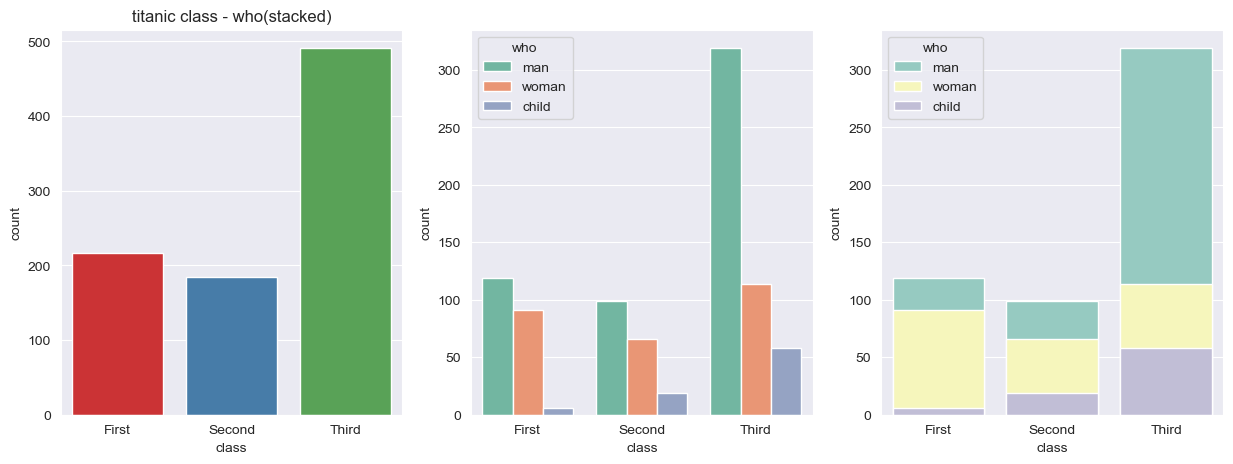

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

titanic = sns.load_dataset('titanic')
# 스타일테마 설정(5가지:darkgrid,whitegird,dark,white,ticks)
sns.set_style('darkgrid')

fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

sns.countplot(x='class',palette='Set1',data=titanic,ax=ax1)
sns.countplot(x='class',hue='who',palette='Set2',data=titanic,ax=ax2)
sns.countplot(x='class',hue='who',palette='Set3',dodge=False,data=titanic,ax=ax3)

ax1.set_title('titanic class')
ax1.set_title('titanic class - who')
ax1.set_title('titanic class - who(stacked)')

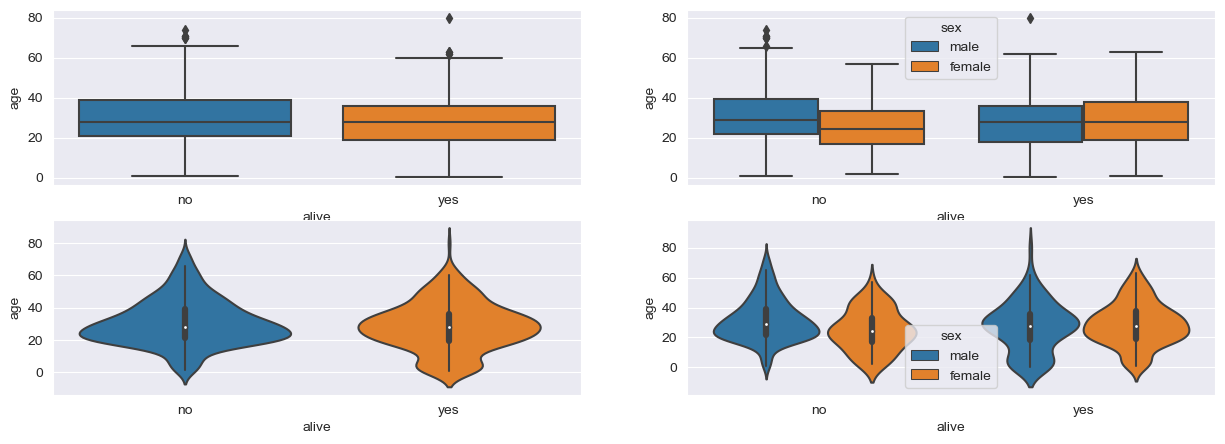

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

titanic = sns.load_dataset('titanic')
# 스타일테마 설정(5가지:darkgrid,whitegird,dark,white,ticks)
sns.set_style('darkgrid')

fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

# 박스 그래프 - 기본 값
sns.boxplot(x='alive',y='age',data=titanic,ax=ax1)
# 박스 그래프 - hue 변수 추가
sns.boxplot(x='alive',y='age',hue='sex',data=titanic,ax=ax2)
# 바이올린 그래프 기본값
sns.violinplot(x='alive',y='age',data=titanic,ax=ax3)
# 바이올린 그래프 - hue 변수 추가
sns.violinplot(x='alive',y='age',hue='sex',data=titanic,ax=ax4)

plt.show()


# 지도시각화(folium)

In [43]:
import folium

# 서울 지도 만들기

seoul_map = folium.Map(location=[37.55,126.98],zoom_start=12)

seoul_map.save('./map/seoul.html')
seoul_map


In [67]:
import folium

seoul_map2 = folium.Map(location=[37.55, 126.98], tiles='http://tile.stamen.com/terrain/{z}/{x}/{y}.png',
                        attr='Stamen Terrain Data, Map by Stamen Design', zoom_start=12)

seoul_map3 = folium.Map(location=[37.55, 126.98], tiles='http://tile.stamen.com/toner/{z}/{x}/{y}.png',
                        attr='Stamen Toner Data, Map by Stamen Design', zoom_start=15)

seoul_map2.save('./map/seoul2.html')
seoul_map3.save('./map/seoul3.html')


In [54]:
from folium.map import Popup
import pandas as pd
import folium
import csv



df = pd.read_excel(r'/Users/choejong-gyu/Documents/05.데이터분석/map/서울지역 대학교 위치.xlsx')
seoul_map = folium.Map(location=[37.55,126.98],zoom_start=12)

df.set_index('이름',inplace=True)

for name,lat,lng in zip(df.index,df.위도,df.경도):
    folium.Marker([lat,lng],popup=name).add_to(seoul_map)

seoul_map.save('./map/seoul_colleges.html')
seoul_map


In [66]:
from folium.map import Popup
import pandas as pd
import folium
import csv



df = pd.read_excel(r'/Users/choejong-gyu/Documents/05.데이터분석/map/서울지역 대학교 위치.xlsx')
seoul_map = folium.Map(location=[37.55,126.98],zoom_start=12)

df.set_index('이름',inplace=True)

for name,lat,lng in zip(df.index,df.위도,df.경도):
    iframe = folium.IFrame(name,width=150,height=30)
    popup = folium.Popup(iframe,max_width=600)
    folium.Marker([lat,lng],popup=popup).add_to(seoul_map)

seoul_map.save('./map/seoul_colleges.html')
seoul_map
